In [1]:
from read_LAMMPS import *
from utils import load

In [2]:
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2.lammpstrj"
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_1.lammpstrj"
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_10e4.lammpstrj"
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_16x.lammpstrj"
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_16h1e4.lammpstrj"
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_16h1e4g.lammpstrj"
in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_10wide.lammpstrj"
#out_file = "lamp2.npy"
#out_file = "lamp2_1e-4.npy"
#out_file = "lamp_16x_half.npy"
out_file = "dump_10wide.npy"
vid_file = "lamp_10wide.mp4"
#vel_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_1.myvel"
#vel_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_10e4.myvel"
#vel_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_16h1e4.myvel"
vel_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_10wide.myvel"

num_dimensions = 2
#timestep = 0.001
timestep = 0.0001
L = 10

#dump_to_traj(in_file, out_file, num_dimensions, timestep)
dump_to_traj(in_file, out_file, num_dimensions, timestep, L, vel_file)

In [3]:
pos, vs, dt, dims = load(out_file, 4)
print(dims)
print(dt)
print(pos.shape, vs.shape)

[   1.01994426 1001.        ]
1.0
(5120, 2, 1001) (5120, 2, 1001)


In [6]:
from findiff import FinDiff
v_diff = FinDiff((2, timestep, 1), acc=4)
dvs = v_diff(vs) # compute velocities by finite differencing
quadratic_variation = np.mean(dvs**2)
print(quadratic_variation)
#2259226.2512599262
#28331.52798886305
# -> 8.93**2 difference

1133.5977806825283


In [7]:
from scipy.stats.stats import pearsonr 
v_diff = FinDiff((2, timestep, 1), acc=4)
vs_2 = v_diff(pos) # compute velocities by finite differencing
vs_2[np.abs(vs_2)>10] = 0
print(vs[1:10, :, 10], "\n", vs_2[1:10, :, 10])
dvs_2 = v_diff(vs_2) # compute velocities by finite differencing
qv_2 = np.mean(dvs_2**2)
print(np.mean(np.abs(vs)))
print(np.mean(np.abs(vs_2)))

[[-0.0147948   0.01489   ]
 [ 0.0071979  -0.00865255]
 [ 0.0075271  -0.0027088 ]
 [-0.00117891  0.00256775]
 [-0.00118121  0.0156106 ]
 [ 0.0150902   0.01815205]
 [-0.00884415  0.00319852]
 [-0.00241697  0.00025148]
 [ 0.00795175  0.00632705]] 
 [[-0.14416667  0.1375    ]
 [ 0.06666667 -0.08083333]
 [ 0.0675     -0.02916667]
 [-0.00666667  0.025     ]
 [-0.01833333  0.15      ]
 [ 0.14166667  0.19583333]
 [-0.08083333  0.025     ]
 [-0.03        0.00833333]
 [ 0.08125     0.05333333]]
0.026908304141139493
0.26899411783009697


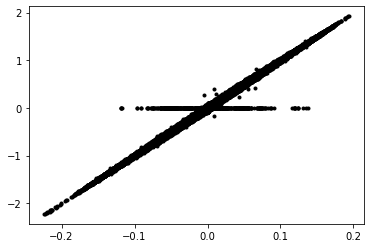

In [8]:
import matplotlib.pyplot as plt
plt.plot(vs.flatten(), vs_2.flatten(), 'k.')
#plt.plot(vs[0, 0, :]-vs_2[0, 0, :], 'k.')
#plt.plot(vs_2[0, 0, :], 'b.')

In [4]:
import matplotlib.pyplot as plt
thres = lambda x:(x if abs(x)<10 else 0)
plt.plot(list(map(thres, (pos[0, 0, 1:100]-pos[0, 0, 0:99])*1e3)), 'k.')
plt.plot(vs[0, 0, :100], 'r.')

NameError: name 'pos' is not defined

0
0
0


C:\Users\nerpa\Dropbox\Research\discrete_sr\code\python\SPIDER_discrete\discrete\read_LAMMPS.py:110: RuntimeWarning: invalid value encountered in true_divide
  qv.set_UVC(vs[:, 0, i] / norms, vs[:, 1, i] / norms, np.angle(vs[:, 0, i] + 1.0j * vs[:, 1, i]))
C:\Users\nerpa\Dropbox\Research\discrete_sr\code\python\SPIDER_discrete\discrete\read_LAMMPS.py:110: RuntimeWarning: invalid value encountered in true_divide
  qv.set_UVC(vs[:, 0, i] / norms, vs[:, 1, i] / norms, np.angle(vs[:, 0, i] + 1.0j * vs[:, 1, i]))


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


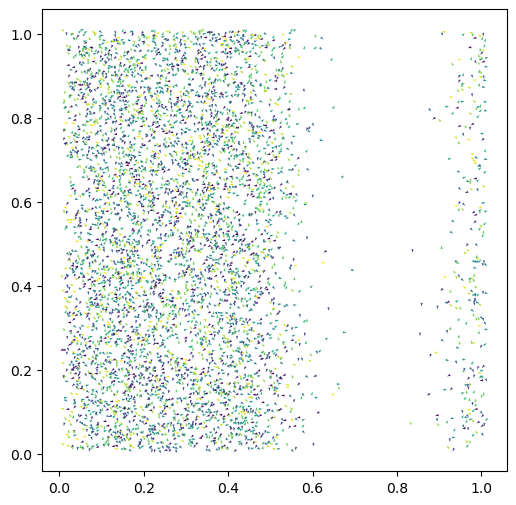

In [4]:
make_video(out_file, vid_file)